## Requisitos:

## 1. Carga y Exploración de Datos:

##Descargar y cargar el dataset.
##Realizar una exploración inicial para entender la estructura del dataset.
##Identificar valores faltantes, duplicados y outliers.

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Define la ruta de tu archivo ZIP en Google Drive
zip_file_path = '/content/drive/MyDrive/TareasMachineLearning/Dataset Vehículos.zip'

# Abre y extrae el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Listar los archivos contenidos en el archivo ZIP
    zip_ref.extractall()  # Extrae todo en el directorio actual

# Verificar qué archivos fueron extraídos
import os
print(os.listdir("."))  # Esto te mostrará los archivos extraídos
# Asume que el archivo Excel se llama 'archivo_excel.xlsx'
csv_file = 'vehicles.csv'

# Cargar el archivo Excel como un DataFrame
dff = pd.read_csv(csv_file)

# Mostrar las primeras filas del DataFrame
dff.head()



['.config', 'vehicles.csv', 'drive', 'sample_data']


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [2]:
dff.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# 2. Limpieza y Preprocesamiento:

#Manejar valores faltantes.
#Eliminar duplicados.
#Corregir inconsistencias en los datos categóricos.
#Escalar las características numéricas.
#Realizar transformaciones necesarias para las características categóricas.

In [4]:
dff.describe().round(3)

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000,4.224800e+05,0.0,420331.000,420331.000
mean,7.311487e+09,7.519903e+04,2011.235,9.804333e+04,NaN,38.494,-94.749
std,4.473170e+06,1.218228e+07,9.452,2.138815e+05,NaN,5.842,18.365
min,7.207408e+09,0.000000e+00,1900.000,0.000000e+00,NaN,-84.122,-159.828
25%,7.308143e+09,5.900000e+03,2008.000,3.770400e+04,NaN,34.602,-111.940
50%,7.312621e+09,1.395000e+04,2013.000,8.554800e+04,NaN,39.150,-88.433
75%,7.315254e+09,2.648575e+04,2017.000,1.335425e+05,NaN,42.399,-80.832
max,7.317101e+09,3.736929e+09,2022.000,1.000000e+07,NaN,82.391,173.886


In [5]:
dff.duplicated().sum()

0

In [6]:
dff.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [7]:
# Determinación de valores únicos
for columna in dff.columns:
  print(f'Valores únicos en la columna {columna}:\n{dff[columna].unique()}\n')

Valores únicos en la columna id:
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]

Valores únicos en la columna url:
['https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html'
 'https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html'
 'https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html'
 ...
 'https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt4-sport/7301591147.html'
 'https://wyoming.craigslist.org/ctd/d/atlanta-2018-lexus-es-es-350-sedan-4d/7301591140.html'
 'https://wyoming.craigslist.org/ctd/d/atlanta-2019-bmw-series-430i-gran-coupe/7301591129.html']

Valores únicos en la columna region:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / d

Determinación de eliminación de columnas porque no son consideradas relevantes para el análisis de la predicción de precio de carros

- Eliminación de la columna

In [8]:
min_latitud = 24.51  # Southernmost point in Hawaii (approx)
max_latitud = 49.38  # Northernmost point in Alaska (approx)
min_longitud = -171.83  # Westernmost point in Alaska (approx)
max_longitud = -66.95

# Asignación de nuevo DF con latitutes y longitudes dentro de Estados Unidos
df = dff[(dff['lat'] >= min_latitud) & (dff['lat'] <= max_latitud) &
                 (dff['long'] >= min_longitud) & (dff['long'] <= max_longitud)]


In [9]:
# Eliminación de columnas con información que no está dentro de las características para predecir precio.
df = df.drop(['description', 'image_url','county','id','url', 'region_url'], axis=1)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413819 entries, 0 to 413818
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        413819 non-null  object 
 1   price         413819 non-null  int64  
 2   year          412722 non-null  float64
 3   manufacturer  396649 non-null  object 
 4   model         408791 non-null  object 
 5   condition     249462 non-null  object 
 6   cylinders     239678 non-null  object 
 7   fuel          411059 non-null  object 
 8   odometer      409506 non-null  float64
 9   title_status  405736 non-null  object 
 10  transmission  411433 non-null  object 
 11  VIN           258929 non-null  object 
 12  drive         286184 non-null  object 
 13  size          114499 non-null  object 
 14  type          322519 non-null  object 
 15  paint_color   285754 non-null  object 
 16  state         413819 non-null  object 
 17  lat           413819 non-null  float64
 18  long

#Manejo de los datos Nulos

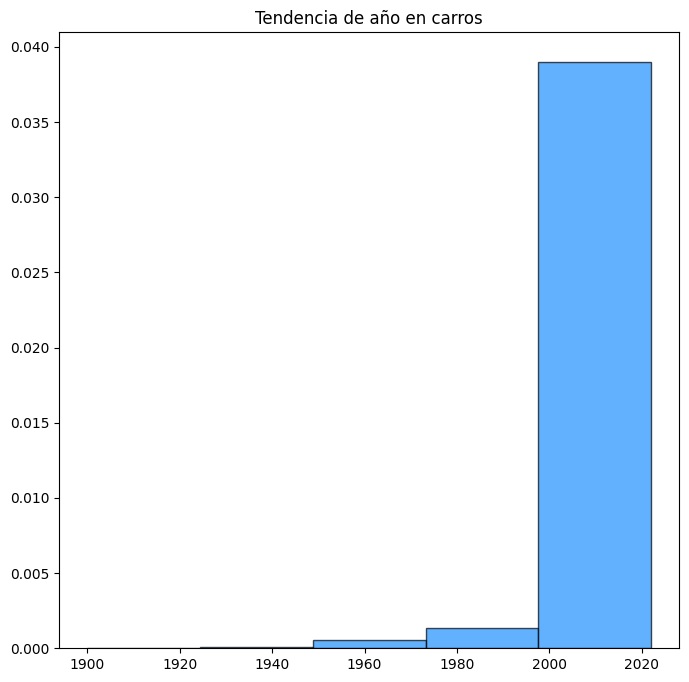

In [10]:
# Visualización de los datos con gráfico histograma para visualizar la distribución de los datos
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.hist(df['year'],bins= 5, color= 'dodgerblue', edgecolor='black', alpha= 0.7, density= True)
plt.title('Tendencia de año en carros')
plt.show()

Gráfico tendencia de año en carros, se proyecta está imagen con el fin de visualizar el año con mayor freucencia dentro del Dataset para luego reemplazar este dato en los nulos en la columna 'year'.

Relleno de datos con nulos con la tendencia en la categoría 'year'.

In [11]:
df['year'] = df['year'].fillna(df['year'].mode()[0])


Manejo de los datos nulos de la columna 'manufacturer'

In [12]:
# Determinación de los datos con mayor frecuencia dentro de la columna 'manufacturer'
list(df['manufacturer'].value_counts().nlargest(10).index)

['ford',
 'chevrolet',
 'toyota',
 'honda',
 'jeep',
 'nissan',
 'ram',
 'gmc',
 'bmw',
 'dodge']

In [13]:
def valores_manufacturer(df,manufacturer): # Definición de la función valores_manufacturer
  tendencia = list(df['manufacturer'].value_counts().nlargest(10).index) # Indicar la tendencia de las 10 marcas con mayor frecuencia
  #dentro de la columna 'manufacturer'
  valor_aleatorio_imputacion = np.random.choice(tendencia, size= df['manufacturer'].isnull().sum())# imputación de
  #las 5 marcas tendencia de manera aleatoria dentro del largo de la columna 'manufacturer' que se encuentre como nulos.
  df.loc[df['manufacturer'].isnull(), manufacturer] = valor_aleatorio_imputacion
  # aplicar los valores aleatorios en la columna 'manufacturer' en los nulos
  return df
# Llamado de la función valores_manufacturer
valores_manufacturer(df, 'manufacturer')
# Verificación de imputación de nulos
print(df['manufacturer'].isna().sum())

0


Manejo de faltantes en la columna 'model'

In [14]:
# Concatenación de año ('year') como string con manufactura ('manufacturer') dentro de una variable
union = df['manufacturer'] + ' ' + df['year'].astype(str)

# Reemplazo de NaN en la columna 'model' con los valores obtenidos dentro de la variable union

df['model'].fillna(union, inplace= True)

#Aplicación de función apply para rellenar los nulos dentro de las filas de 'model' con la conversión de 'yaer' a str
df['model'] = df.apply(lambda row: f"{row['manufacturer']} {row['year']}" if pd.isnull(row['model'])else row['model'],
                       axis= 1
)

Manejo de faltantes en la columna 'condition', 'VIN', 'drive' y 'paint_color'

In [15]:
# Al tener datos nulos dentro de la columna 'condition' y al no tener con que completar la información de estado
#del vehículo se toma la alternativa de asignarle la palabra 'Otro'
df['condition'] = df['condition'].fillna('Otro')

# Asignación de la palabra 'Desconocido' para la columna 'VIN' en los faltantes
df['VIN'] = df['VIN'].fillna('Desconocido')

# Asignación de la palabra 'Desconocido' para la columna 'drive' en los faltantes
df['drive'] = df['drive'].fillna('Desconocido')

# Asignación de la palabra 'Desconocido' para la columna 'paint_color' en los faltantes
df['paint_color'] = df['paint_color'].fillna('Desconocido')

Manejo de faltantes en las columnas 'cylinders', 'fuel', 'transmission', 'size', 'type'

In [16]:
# Asignación de la moda para faltantes dentro de las columnas 'cylinders' y 'fuel'
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

# Para faltantes en la columna 'title_status' que son alrededor del 2% le asigno la media.
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])

#Asignación de la moda para faltantes dentro de la columna 'size'
df['size'] = df['size'].fillna(df['size'].mode()[0])

#Asignación de la moda para faltantes dentro de la columna 'type'
df['type'] = df['type'].fillna(df['type'].mode()[0])

Manejo de faltantes en la columna 'odometer', puesto que hacen falta alrededor del 2 % de los datos la reemplazo por la media de los datos

In [17]:
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())

Manejo de datos atípicos en cada una de las columnas del Dataset

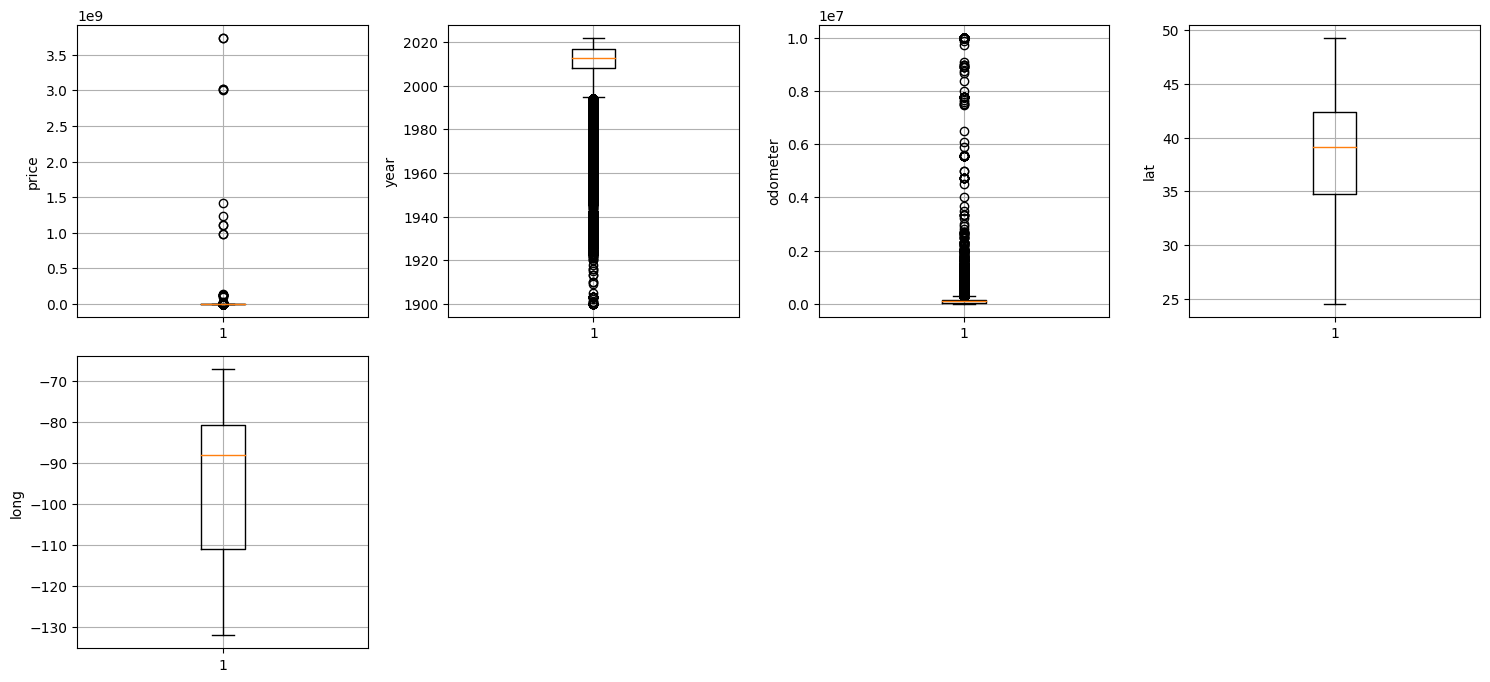

In [18]:
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

Eliminación de datos atípicos en las categorías 'price' y 'odometer'

In [19]:
columnas = ['price', 'odometer', 'year']
for columna in columnas:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  filtroOutlierAbajo = df[columna] < (Q1 - 1.5 * IQR)
  filtroOutlierArriba = df[columna] > (Q3 + 1.5 * IQR)
  print(f"Límite inferior: {Q1 - 1.5 * IQR}")
  print(f"Límite Superior: {Q3 + 1.5 * IQR}")
  indicesALimpiarAbajo = df.loc[filtroOutlierAbajo].index
  indicesALimpiarArriba = df.loc[filtroOutlierArriba].index
  df.loc[indicesALimpiarAbajo, columna] = Q1 - 1.5 * IQR
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR

df.describe()

Límite inferior: -24873.5
Límite Superior: 57322.5
Límite inferior: -104517.5
Límite Superior: 277110.5
Límite inferior: 1994.5
Límite Superior: 2030.5


<ipython-input-19-fcbb032e9200>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '57322.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR


,price,year,odometer,lat,long
count,413819.000000,413819.000000,413819.000000,413819.000000,413819.000000
mean,17162.728935,2011.918951,92215.220195,38.437325,-93.891513
std,14169.907967,6.392266,62921.799810,5.243859,16.859619
min,0.000000,1994.500000,0.000000,24.555200,-131.923828
25%,5950.000000,2008.000000,38593.000000,34.737481,-110.978710
50%,13900.000000,2013.000000,87474.000000,39.145385,-88.066450
75%,26499.000000,2017.000000,134000.000000,42.348459,-80.731900
max,57322.500000,2022.000000,277110.500000,49.253073,-67.143300


Eliminación en la columna 'price' que sea igual menor a 800 dólares


In [20]:
filtroP = df['price'] <= 800
df[filtroP]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
19,auburn,0.0,2011.0,jeep,compass,excellent,6 cylinders,gas,99615.0,clean,automatic,Desconocido,Desconocido,full-size,SUV,Desconocido,al,32.547500,-85.468200,2021-04-30T16:35:11-0500
69,auburn,80.0,2004.0,honda,honda 2004.0,excellent,6 cylinders,gas,94020.0,clean,automatic,Desconocido,Desconocido,full-size,sedan,Desconocido,al,32.811300,-85.174900,2021-04-19T12:55:06-0500
99,auburn,0.0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,31.425091,-85.617723,2021-04-12T11:20:35-0500
100,auburn,0.0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,31.425091,-85.617723,2021-04-12T11:20:00-0500
101,auburn,0.0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,31.425091,-85.617723,2021-04-12T11:19:58-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413703,wyoming,0.0,2018.0,nissan,peterbilt 579,Otro,6 cylinders,diesel,1.0,clean,automatic,Desconocido,Desconocido,full-size,sedan,Desconocido,wy,42.862274,-106.307144,2021-04-07T15:15:05-0600
413751,wyoming,0.0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,full-size,sedan,silver,wy,40.114685,-104.971971,2021-04-06T17:00:19-0600
413771,wyoming,0.0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,full-size,sedan,blue,wy,40.114685,-104.971971,2021-04-05T17:00:55-0600
413775,wyoming,0.0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy,45.082436,-94.334686,2021-04-05T15:18:42-0600


Eliminación de 'price' menor a 800 dólares

In [21]:
ubicacion_eliminar = df[df['price'] <= 800].index
# Eliminación de las filas con drop
df = df.drop(ubicacion_eliminar)

In [22]:
df.describe()

,price,year,odometer,lat,long
count,372180.000000,372180.000000,372180.000000,372180.000000,372180.000000
mean,19072.943100,2011.714684,93496.271579,38.424937,-93.391688
std,13674.143628,6.456684,63491.384803,5.219307,16.573490
min,804.000000,1994.500000,0.000000,24.555200,-131.923828
25%,7900.000000,2008.000000,38891.000000,34.762790,-106.681800
50%,15900.000000,2013.000000,89000.000000,39.187084,-87.792749
75%,27990.000000,2017.000000,136498.000000,42.300673,-80.690000
max,57322.500000,2022.000000,277110.500000,49.253073,-67.143300


# Verificación del tratamiento de nulos y eliminación de columnas son una fuerte relevancia en la predicción de precio de carros.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372180 entries, 0 to 413818
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        372180 non-null  object 
 1   price         372180 non-null  float64
 2   year          372180 non-null  float64
 3   manufacturer  372180 non-null  object 
 4   model         372180 non-null  object 
 5   condition     372180 non-null  object 
 6   cylinders     372180 non-null  object 
 7   fuel          372180 non-null  object 
 8   odometer      372180 non-null  float64
 9   title_status  372180 non-null  object 
 10  transmission  372180 non-null  object 
 11  VIN           372180 non-null  object 
 12  drive         372180 non-null  object 
 13  size          372180 non-null  object 
 14  type          372180 non-null  object 
 15  paint_color   372180 non-null  object 
 16  state         372180 non-null  object 
 17  lat           372180 non-null  float64
 18  long     

# 3. Exploración de Datos:

#Crear visualizaciones univariadas y multivariadas.
#Calcular estadísticas descriptivas.

Visualizaciones univariadas

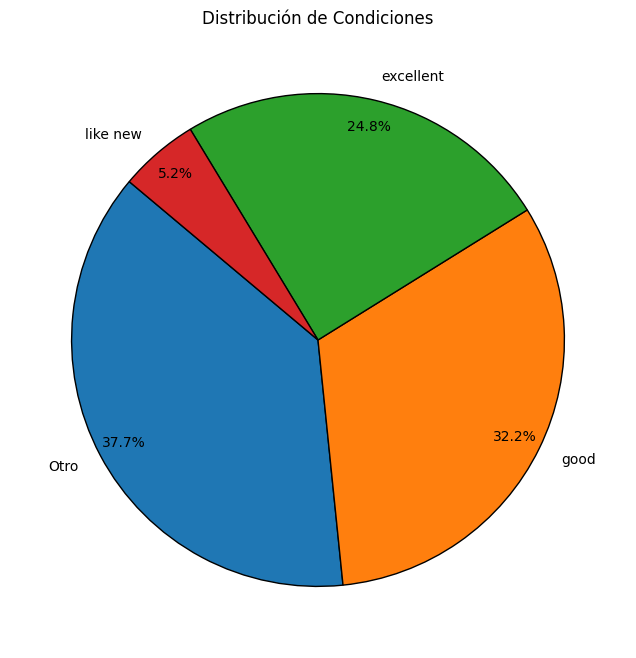

In [24]:
import matplotlib.pyplot as plt
# Características: Excellente, good, like new, Otro
categorias= ['excellent', 'good', 'like new', 'Otro']
filtro_df = df[df['condition'].isin(categorias)]

# Contar los valores de las condiciones y obtener las etiquetas
etiquetas = filtro_df['condition'].value_counts().index
talla = filtro_df['condition'].value_counts()

plt.figure(figsize=(8,8))

plt.pie(talla, labels= etiquetas, autopct='%1.1f%%', startangle=140, pctdistance=0.89, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Condiciones')
fig = plt.gcf()
plt.show()

Distribución estado del carro se puede apreciar que el 37.7% se desconocer su estado, mientras que en buen estado en la data son el 32.2% de los datos, en excelente estado en 24.8% y como nuevo sólo el 5.2%.

Text(0.5, 1.0, 'Top de tipo de carro ')

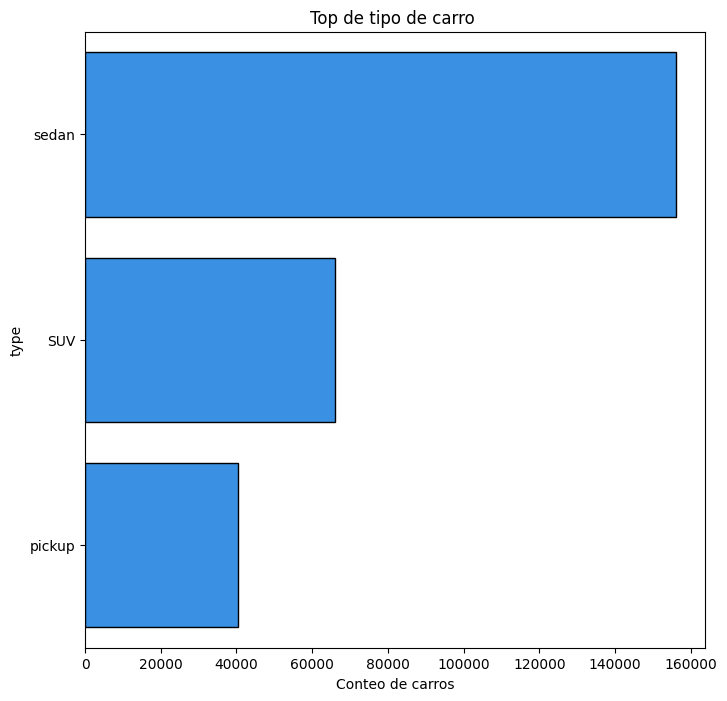

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['type'] , data =df ,color= 'dodgerblue', edgecolor='black', order =df['type'].value_counts().index[:3])
plt.xlabel('Conteo de carros')
plt.title('Top de tipo de carro ')



Dentro del dataset se envidencia que estos tres tipos de estilos de carros son los que predominan más, sedan con 160000, SUV con 7000 y pickup con 40000.

Visualizaciones multivariadas

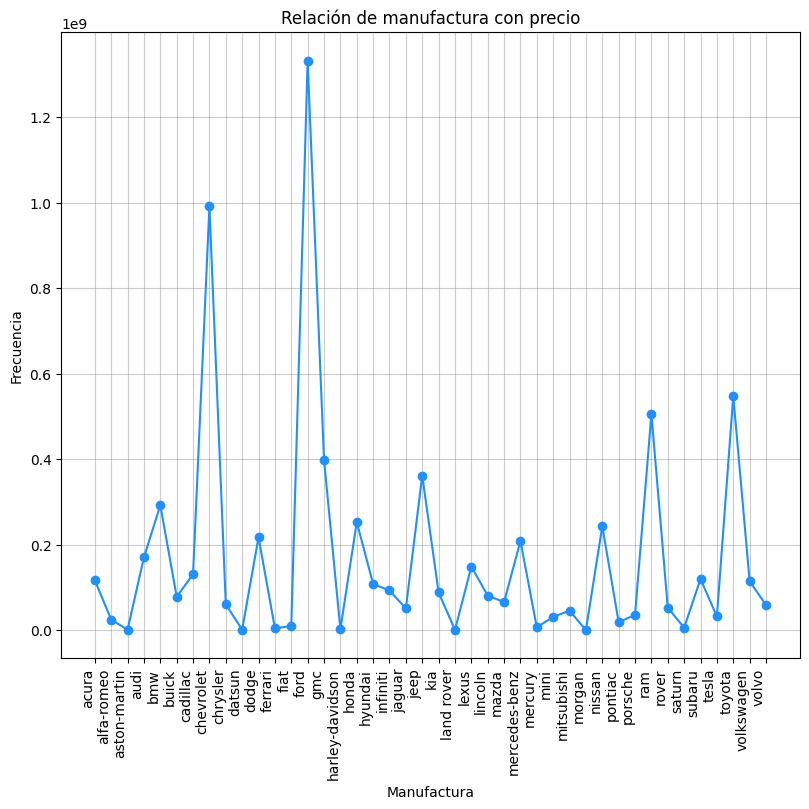

In [26]:
#Gráfico multivariable

import matplotlib.pyplot as plt

# Agrupo las columnas
grupo = df.groupby('manufacturer')['price'].sum()

# Gráfico de líneas
# Tamaño de la figura
plt.figure(figsize=(8,8))
#Título
plt.title('Relación de manufactura con precio')
# Tipo de códgio para gráfico de línea
plt.plot(grupo.index, grupo.values, linestyle='-', color= 'dodgerblue', marker= 'o')
# Añado cuadrícula
plt.grid(axis = 'both', c = 'grey', alpha= .4, linestyle  = '-' )
# Rotación de las etiquetas del eje x
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
#Etiquetas de los ejes X y Y
plt.xlabel('Manufactura')
plt.ylabel('Frecuencia')
plt.show()

En el gráfico anterior se puede evidenciar aquellas manufacturas con los precios más altos.

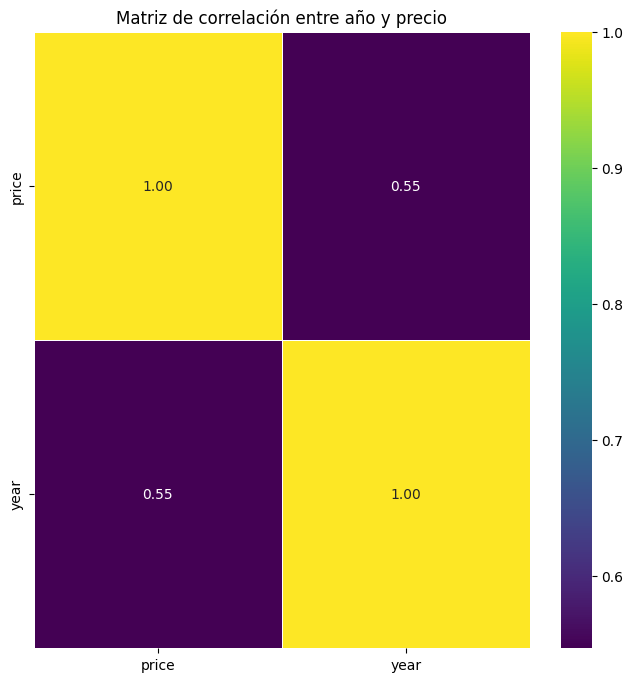

In [27]:
# Selección de las columnas 'price' y 'year' para mirar su correlación
data = df[['price', 'year']]

# Calculo de la correlación
matrix = data.corr()


# Visualización de la matrix de correlación con el mapa de calor
plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, cmap='viridis', fmt= '.2f', linewidths= 0.5)
plt.title('Matriz de correlación entre año y precio')
plt.show()


ESCRIBIR UN COMENTARIO DE ESTA GRÁFICA

Estadísticas descriptivas

In [28]:
df.describe().round(3)

,price,year,odometer,lat,long
count,372180.000,372180.000,372180.000,372180.000,372180.000
mean,19072.943,2011.715,93496.272,38.425,-93.392
std,13674.144,6.457,63491.385,5.219,16.573
min,804.000,1994.500,0.000,24.555,-131.924
25%,7900.000,2008.000,38891.000,34.763,-106.682
50%,15900.000,2013.000,89000.000,39.187,-87.793
75%,27990.000,2017.000,136498.000,42.301,-80.690
max,57322.500,2022.000,277110.500,49.253,-67.143


## 4. Modelado y Evaluación:

## Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
## Evaluar los modelos utilizando MSE, RMSE, y R^2.
## Seleccionar el mejor modelo basado en las métricas de evaluación.

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Modelo de Regresión Lineal

In [30]:
df_muestra =  df.sample(frac=0.1, random_state=42)
X_muestra = df_muestra[['region', 'manufacturer', 'year', 'model', 'condition', 'cylinders', 'fuel','odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']]
y_muestra = df_muestra['price']

# División del conjunto de datos de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X_muestra, y_muestra, test_size= 0.3, random_state=42)

# Definición de las columnas numéricas y categóricas
numeric_features = ['year', 'odometer']
categorical_features = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

# Orden de la categoría 'condition' para transformación ordinal
orden_condition = ['new', 'like new', 'excellent', 'good', 'fair', 'Otro', 'salvage']


# creación de un Pipeline para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')), # relleno de faltantes si es que los hay
    ('saler', StandardScaler()) # Escalado de las categorías numéricas
])

# Creación de un Pipeline para columnas categóricas
categorical_transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[orden_condition], handle_unknown='use_encoded_value', unknown_value=-1), ['condition']),
        ('nominal', OneHotEncoder(handle_unknown='ignore'), ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state'])
    ],
    remainder='passthrough',  # Deja columnas no transformadas
    n_jobs=-1,  # Usar todos los núcleos disponibles para el procesamiento
    verbose=True,  # Imprimir información sobre el progreso
    sparse_threshold=0.3  # Umbral para crear matrices dispersas
)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372180 entries, 0 to 413818
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        372180 non-null  object 
 1   price         372180 non-null  float64
 2   year          372180 non-null  float64
 3   manufacturer  372180 non-null  object 
 4   model         372180 non-null  object 
 5   condition     372180 non-null  object 
 6   cylinders     372180 non-null  object 
 7   fuel          372180 non-null  object 
 8   odometer      372180 non-null  float64
 9   title_status  372180 non-null  object 
 10  transmission  372180 non-null  object 
 11  VIN           372180 non-null  object 
 12  drive         372180 non-null  object 
 13  size          372180 non-null  object 
 14  type          372180 non-null  object 
 15  paint_color   372180 non-null  object 
 16  state         372180 non-null  object 
 17  lat           372180 non-null  float64
 18  long     

In [32]:
# Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
# Crear y entrenar el modelo de regresión lineal
# Crear el pipeline que incluye el preprocesador y el modelo
modelo_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('model', LinearRegression())
])

In [33]:
# Ajustar el Pipeline a los datos de entrenamiento
modelo_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_pipeline.predict(X_test)

In [34]:
y_muestra.describe()

,price
count,37218.000000
mean,19213.911978
std,13686.583232
min,805.000000
25%,7950.000000
50%,15990.000000
75%,28000.000000
max,57322.500000


## Métricas de la regresión lineal

In [35]:
# Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba.
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseRL = mean_squared_error(y_test, y_pred)
r2RL = r2_score(y_test, y_pred)
maeRL = mean_absolute_error(y_test, y_pred)

print(f'Error Cuadrático Medio: {mseRL}')
print(f'R-cuadrado: {r2RL}')
print(f'Error Absoluto Medio: {maeRL}')

Error Cuadrático Medio: 50579899.325516164
R-cuadrado: 0.7311960133461528
Error Absoluto Medio: 4427.8794792594745


ESCRIBIR CONCLUSIÓN

In [36]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,price,year,odometer,lat,long
count,"372,180","372,180","372,180","372,180","372,180"
mean,"19,073","2,012","93,496",38,-93
std,"13,674",6,"63,491",5,17
min,804,"1,994",0,25,-132
25%,"7,900","2,008","38,891",35,-107
50%,"15,900","2,013","89,000",39,-88
75%,"27,990","2,017","136,498",42,-81
max,"57,322","2,022","277,110",49,-67


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Modelo Árbol de Decisión

In [38]:
arbol_D = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('modelo', DecisionTreeRegressor(max_depth=20, random_state=42))
])
arbol_D

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('saler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  ColumnTransformer(n_jobs=-1,
                                                                    remainder='passthrough',
                                                                    transformers=[('ordinal',
                                                                                   OrdinalEncoder(categories=[['new',
                                                                                                               'like '
                                                                                                               'new',
                                                                                                               'excellent',
                                                                                                               'good',
                                                                                                               'fair',
                                                                                                               'Otro',
                                                                                                               'salv...
                                                                                    'manufacturer',
                                                                                    'model',
                                                                                    'cylinders',
                                                                                    'fuel',
                                                                                    'title_status',
                                                                                    'transmission',
                                                                                    'VIN',
                                                                                    'drive',
                                                                                    'size',
                                                                                    'type',
                                                                                    'paint_color',
                                                                                    'state'])],
                                                                    verbose=True),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'VIN',
                                                   'drive', 'size', 'type',
                                                   'paint_color', 'state'])])),
                ('modelo',
                 DecisionTreeRegressor(max_depth=20, random_state=42))])

In [39]:
# Ajustar el Pipeline a los datos de entrenamiento
arbol_D.fit(X_train, y_train)

# Realizar predicciones
y_predD = arbol_D.predict(X_test)

In [40]:
# Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba.
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseD = mean_squared_error(y_test, y_predD)
r2D = r2_score(y_test, y_predD)
maeD = mean_absolute_error(y_test, y_predD)

print(f'Error Cuadrático Medio: {mseD}')
print(f'R-cuadrado: {r2D}')
print(f'Error Absoluto Medio: {maeD}')

Error Cuadrático Medio: 53003397.36876547
R-cuadrado: 0.7183164713865947
Error Absoluto Medio: 4421.4755237487325


# Modelo Bagging Regressor

In [41]:
# Crear y entrenar el modelo de Bagging Regressor
# Crear el pipeline que incluye el preprocesador y el modelo
modelo_BR = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('model', BaggingRegressor(DecisionTreeRegressor(), n_estimators=30, #n_estimators=30 ; cuantos arboles voy a copiar
                               max_samples=100, bootstrap=True, random_state=42)) #max_samples=200; cuantas muestras van a entrar por cada árbol máximo
                                                #bootstrap=True, me dice si es baggin(reemplazo) o pasting(no reeemplazo)  y random_state=42
])

modelo_BR


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('saler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  ColumnTransformer(n_jobs=-1,
                                                                    remainder='passthrough',
                                                                    transformers=[('ordinal',
                                                                                   OrdinalEncoder(categories=[['new',
                                                                                                               'like '
                                                                                                               'new',
                                                                                                               'excellent',
                                                                                                               'good',
                                                                                                               'fair',
                                                                                                               'Otro',
                                                                                                               'salv...
                                                                                    'title_status',
                                                                                    'transmission',
                                                                                    'VIN',
                                                                                    'drive',
                                                                                    'size',
                                                                                    'type',
                                                                                    'paint_color',
                                                                                    'state'])],
                                                                    verbose=True),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'VIN',
                                                   'drive', 'size', 'type',
                                                   'paint_color', 'state'])])),
                ('model',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  max_samples=100, n_estimators=30,
                                  random_state=42))])

In [42]:
# Ajustar el Pipeline a los datos de entrenamiento
modelo_BR.fit(X_train, y_train)

# Realizar predicciones
y_predBR = modelo_BR.predict(X_test)

Métricas Bagging Regresor

In [43]:
# Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba.
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseBR = mean_squared_error(y_test, y_predBR)
r2BR = r2_score(y_test, y_predBR)
maeBR = mean_absolute_error(y_test, y_predBR)

print(f'Error Cuadrático Medio: {mseBR}')
print(f'R-cuadrado: {r2BR}')
print(f'Error Absoluto Medio: {maeBR}')

Error Cuadrático Medio: 64910106.6522418
R-cuadrado: 0.6550389448195892
Error Absoluto Medio: 5657.760175234343


## Modelo Random Forest Regressor

In [44]:
modelo_Random = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
   ('modelo', RandomForestRegressor(n_estimators=30, max_samples=100,random_state=42))

])
modelo_Random

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('saler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  ColumnTransformer(n_jobs=-1,
                                                                    remainder='passthrough',
                                                                    transformers=[('ordinal',
                                                                                   OrdinalEncoder(categories=[['new',
                                                                                                               'like '
                                                                                                               'new',
                                                                                                               'excellent',
                                                                                                               'good',
                                                                                                               'fair',
                                                                                                               'Otro',
                                                                                                               'salv...
                                                                                    'model',
                                                                                    'cylinders',
                                                                                    'fuel',
                                                                                    'title_status',
                                                                                    'transmission',
                                                                                    'VIN',
                                                                                    'drive',
                                                                                    'size',
                                                                                    'type',
                                                                                    'paint_color',
                                                                                    'state'])],
                                                                    verbose=True),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'VIN',
                                                   'drive', 'size', 'type',
                                                   'paint_color', 'state'])])),
                ('modelo',
                 RandomForestRegressor(max_samples=100, n_estimators=30,
                                       random_state=42))])

In [45]:
# Ajustar el Pipeline a los datos de entrenamiento
modelo_Random.fit(X_train, y_train)

# Realizar predicciones
y_predRandom = modelo_Random.predict(X_test)

Métricas del Random Forest Regressor

In [46]:
# Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba.
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseRandom = mean_squared_error(y_test, y_predRandom)
r2Random = r2_score(y_test, y_predRandom)
maeRandom = mean_absolute_error(y_test, y_predRandom)

print(f'Error Cuadrático Medio: {mseRandom}')
print(f'R-cuadrado: {r2Random}')
print(f'Error Absoluto Medio: {maeRandom}')

Error Cuadrático Medio: 65441140.352235526
R-cuadrado: 0.65221679654509
Error Absoluto Medio: 5681.152153859932


# -Benchmarking

In [47]:
# Evaluación del modelo: REGRESIÓN LINEAL
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseRL = mean_squared_error(y_test, y_pred)
r2RL = r2_score(y_test, y_pred)
maeRL = mean_absolute_error(y_test, y_pred)
print('\n Métricas del modelo Regresión Lineal')
print(f'Error Cuadrático Medio: {mseRL}')
print(f'R-cuadrado: {r2RL}')
print(f'Error Absoluto Medio: {maeRL}')

# Evaluación del modelo: ÁRBOL DE DECISIÓN
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseD = mean_squared_error(y_test, y_predD)
r2D = r2_score(y_test, y_predD)
maeD = mean_absolute_error(y_test, y_predD)
print('\n Métricas del modelo Árbol de Decisión')
print(f'Error Cuadrático Medio: {mseD}')
print(f'R-cuadrado: {r2D}')
print(f'Error Absoluto Medio: {maeD}')

# Evaluación del modelo: BAGGING REGRESSOR
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseBR = mean_squared_error(y_test, y_predBR)
r2BR = r2_score(y_test, y_predBR)
maeBR = mean_absolute_error(y_test, y_predBR)
print('\n Métricas del modelo Bagging Regressor')
print(f'Error Cuadrático Medio: {mseBR}')
print(f'R-cuadrado: {r2BR}')
print(f'Error Absoluto Medio: {maeBR}')

# Evaluación del modelo: RANDOM FOREST REGRESSOR
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mseRandom = mean_squared_error(y_test, y_predRandom)
r2Random = r2_score(y_test, y_predRandom)
maeRandom = mean_absolute_error(y_test, y_predRandom)
print('\n Métricas del modelo Random Forest Regressor')
print(f'Error Cuadrático Medio: {mseRandom}')
print(f'R-cuadrado: {r2Random}')
print(f'Error Absoluto Medio: {maeRandom}')




 Métricas del modelo Regresión Lineal
Error Cuadrático Medio: 50579899.325516164
R-cuadrado: 0.7311960133461528
Error Absoluto Medio: 4427.8794792594745

 Métricas del modelo Árbol de Decisión
Error Cuadrático Medio: 53003397.36876547
R-cuadrado: 0.7183164713865947
Error Absoluto Medio: 4421.4755237487325

 Métricas del modelo Bagging Regressor
Error Cuadrático Medio: 64910106.6522418
R-cuadrado: 0.6550389448195892
Error Absoluto Medio: 5657.760175234343

 Métricas del modelo Random Forest Regressor
Error Cuadrático Medio: 65441140.352235526
R-cuadrado: 0.65221679654509
Error Absoluto Medio: 5681.152153859932


Conclusión:
Al comparar las métricas de evaluación de cada modelo se puede apreciar que el modelo Regresión lineal es el que mejor métricas tiene ya su R2 es muy cercano a 1 (0.729) o sea que se ajusta a los datos, el error cuadrático medio y el error absoluto medio son menores en comparación con el resto, por otro lado, el error absoluto medio es menor a la desviación estándar del target ('price').

 # 5. Optimización del Modelo:

#Optimizar el modelo seleccionado utilizando GridSearchCV.

In [48]:
from sklearn.model_selection import GridSearchCV
#Nuevamente entrenamiento del modelo Árbol de Decisión
Arbol_Decision = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

#Definición de parámetros
parametros_A = {
    'modelo__max_depth': range(1,10),
    'modelo__min_samples_split': range(2, 5),  # Número mínimo de muestras para dividir un nodo
    'modelo__min_samples_leaf': range(1, 5)
}

#Se realiza validación cruzada
grid = GridSearchCV(Arbol_Decision, parametros_A, cv=2, scoring='neg_mean_squared_error', n_jobs=4)
grid.fit(X_train, y_train)

#Resultados
R_mejor = grid.best_params_
R_mejor

{'modelo__max_depth': 9,
 'modelo__min_samples_leaf': 4,
 'modelo__min_samples_split': 2}